In [ ]:
%pip install requests pandas matplotlib yake

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
url = "https://gamma-api.polymarket.com/events"
params = {
    "closed": True,
    "start_date_min": "2024-01-01T00:00:00Z",
    "end_date_max": "2025-12-31T23:59:59Z",
    "volume_min": 100_000,
    "limit": 100,
    "order": "volume",
    "ascending": False,
}

response = requests.get(url, params=params)
events = response.json()

print(f"Fetched {len(events)} events")

Fetched 100 events


In [106]:
df = pd.DataFrame(events)

df.head(3)

,id,ticker,slug,title,description,resolutionSource,startDate,creationDate,endDate,image,...,eventWeek,score,period,gameId,estimatedValue,liquidity,volume24hr,liquidityClob,competitive,liquidityAmm
0,903193,presidential-election-winner-2024,presidential-election-winner-2024,Presidential Election Winner 2024,This is a market on predicting the winner of t...,,2024-01-04T22:58:00Z,2024-01-04T23:04:57.844Z,2024-11-05T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12815,nba-champion-2024-2025,nba-champion-2024-2025,NBA Champion,This is a market on which team will win the NB...,,2024-09-24T18:02:47.790446Z,2024-09-24T18:02:47.790441Z,2025-06-23T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11439,superbowl-champion-2025,superbowl-champion-2025,Super Bowl Champion 2025,This is a market on predicting the winner of t...,,2024-07-09T17:05:50.641616Z,2024-07-09T17:05:50.641613Z,2025-02-09T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df['volume'] = pd.to_numeric(df.get('volume', 0))
df['start_date'] = pd.to_datetime(df['startDate'], utc=True, format='mixed')
df['end_date'] = pd.to_datetime(df['endDate'], utc=True, format='mixed')

print(f"Parsing results:")
print(f"Total events: {len(df)}")

Parsing results:
Total events: 100


In [108]:
top30 = df.head(30)[['id', 'title', 'volume', 'start_date', 'end_date']].copy()

print(f"Top 30 events by volume in 2024\n")
print(f"Total volume: ${top30['volume'].sum():,.0f}")

Top 30 events by volume in 2024

Total volume: $14,668,249,427


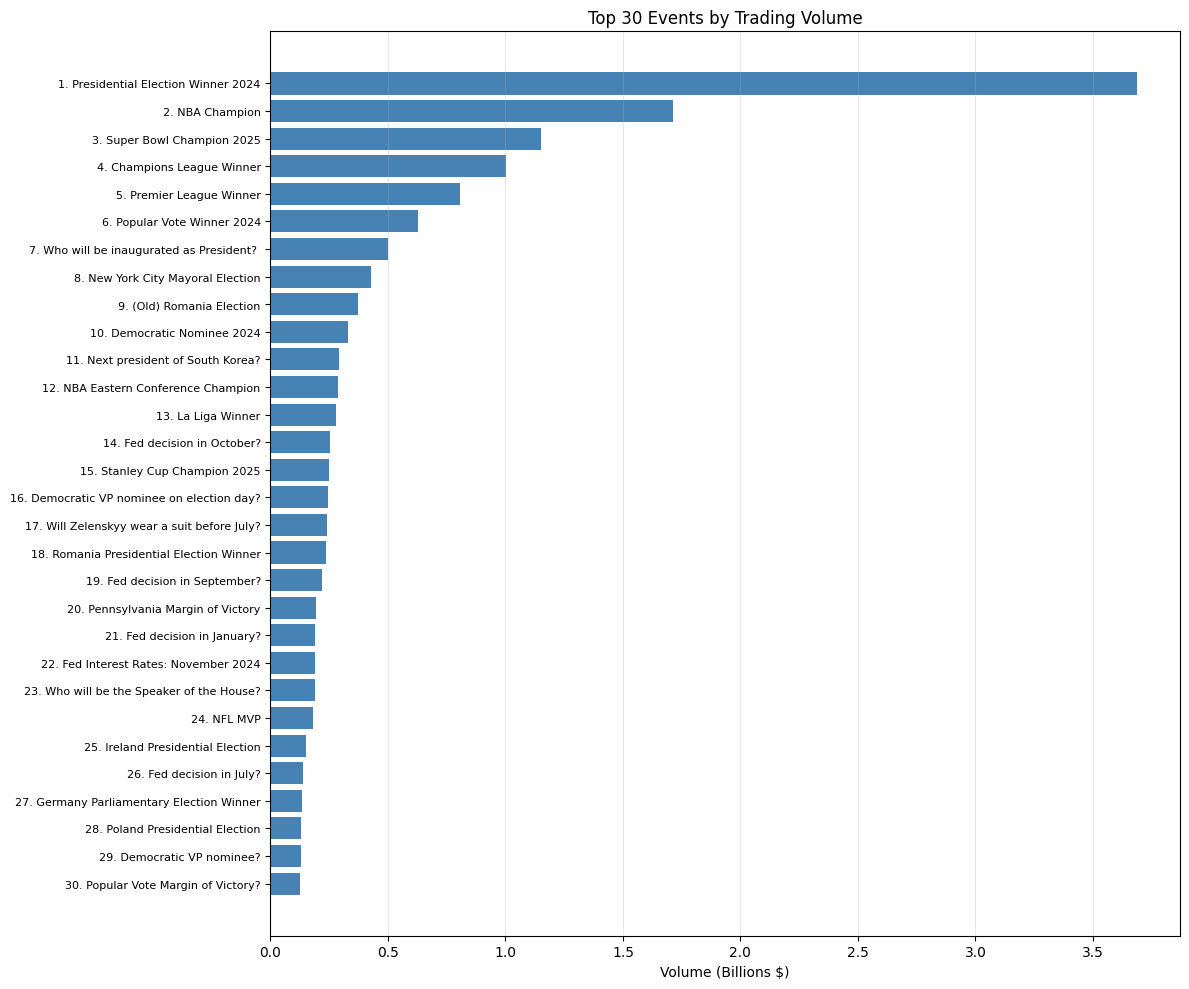

In [109]:
plt.figure(figsize=(12, 10))
plt.barh(range(len(top30)), top30['volume'] / 1e9, color='steelblue')
plt.yticks(range(len(top30)), [f"{i+1}. {t[:45]}..." if len(t) > 45 else f"{i+1}. {t}" for i, t in enumerate(top30['title'])], fontsize=8)
plt.xlabel('Volume (Billions $)')
plt.title('Top 30 Events by Trading Volume')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

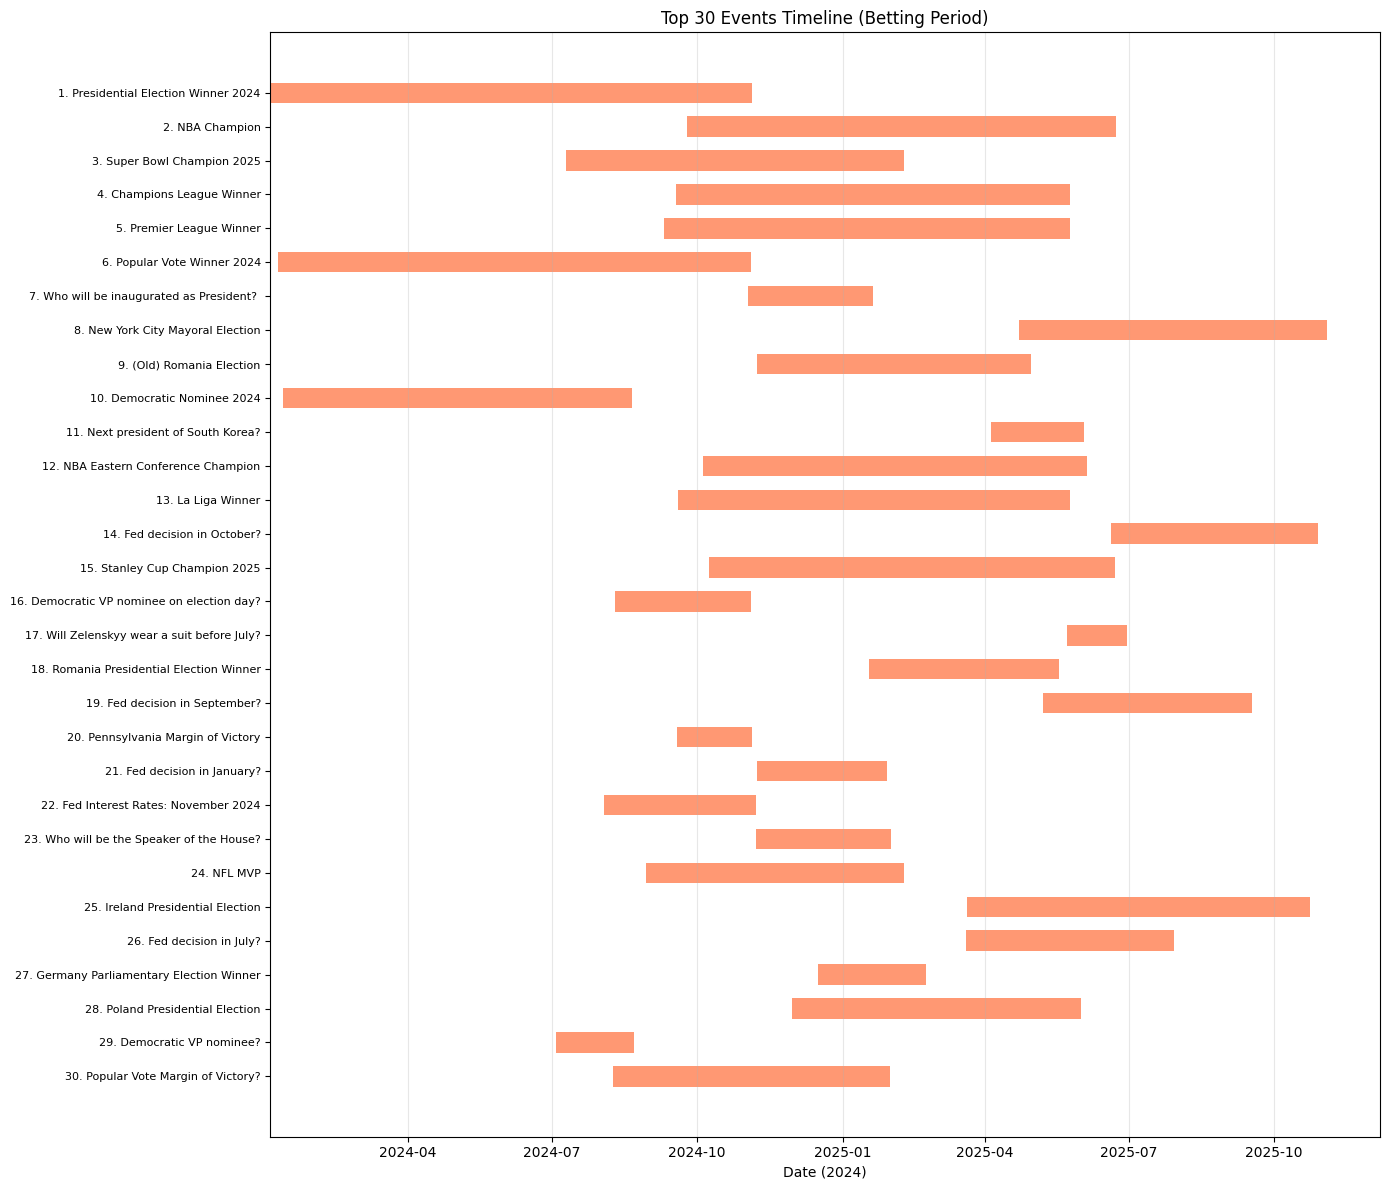

In [110]:
plt.figure(figsize=(14, 12))

for i, (start, end, title) in enumerate(zip(top30['start_date'], top30['end_date'], top30['title'])):
    duration = (end - start).days
    plt.barh(i, duration, left=start, height=0.6, color='coral', alpha=0.8)

plt.yticks(range(len(top30)), [f"{i+1}. {t[:40]}..." if len(t) > 40 else f"{i+1}. {t}" for i, t in enumerate(top30['title'])], fontsize=8)
plt.xlabel('Date (2024)')
plt.title('Top 30 Events Timeline (Betting Period)')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [117]:
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days

long_events = df[df['duration_days'] >= 180].copy()
top5_long = long_events.nlargest(5, 'volume')

print("Top 5 events with 6+ months duration:\n")
for idx, row in top5_long.iterrows():
    print(f"{row['title'][:60]} | '{row['id']}'")
    print(f"  Volume: ${row['volume']:,.0f}")
    print(f"  Duration: {row['duration_days']} days ({row['duration_days']/30:.1f} months)")
    print(f"  Period: {row['start_date'].date()} → {row['end_date'].date()}\n")

Top 5 events with 6+ months duration:

Presidential Election Winner 2024 | '903193'
  Volume: $3,686,335,059
  Duration: 305 days (10.2 months)
  Period: 2024-01-04 → 2024-11-05

NBA Champion | '12815'
  Volume: $1,712,132,664
  Duration: 271 days (9.0 months)
  Period: 2024-09-24 → 2025-06-23

Super Bowl Champion 2025 | '11439'
  Volume: $1,152,274,393
  Duration: 214 days (7.1 months)
  Period: 2024-07-09 → 2025-02-09

Champions League Winner | '12585'
  Volume: $1,001,676,674
  Duration: 249 days (8.3 months)
  Period: 2024-09-17 → 2025-05-25

Premier League Winner | '12483'
  Volume: $808,665,619
  Duration: 257 days (8.6 months)
  Period: 2024-09-09 → 2025-05-25

